**PROJECT TITLE :- ANALYTICS FOR HOSPITAL'S HEALTH-CARE DATA** 



**TEAM ID :- PNT2022TMID04514**


**TEAM MEMBER NAME :- SHANMUGA PRIYA S(737819CSR185)**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn import  metrics
%matplotlib inline

**LOADING LABALONE DATASET**

In [26]:
abalone = pd.read_csv('abalone.csv', sep=',')

In [27]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**UNIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


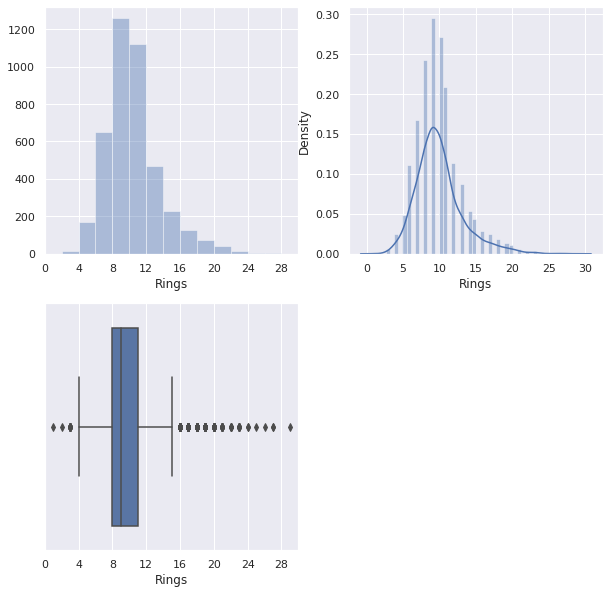

In [6]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(abalone['Rings'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

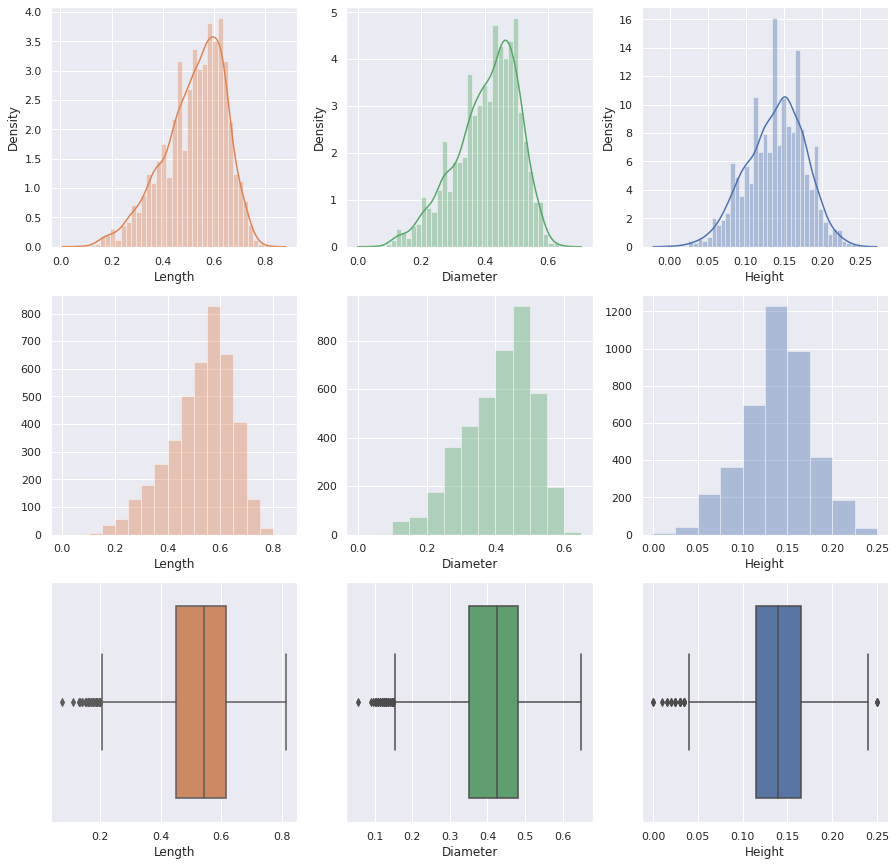

In [7]:
abalone = abalone[abalone['Height'] < 0.4]

plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(abalone['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(abalone['Height'], color=colors[i % 3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

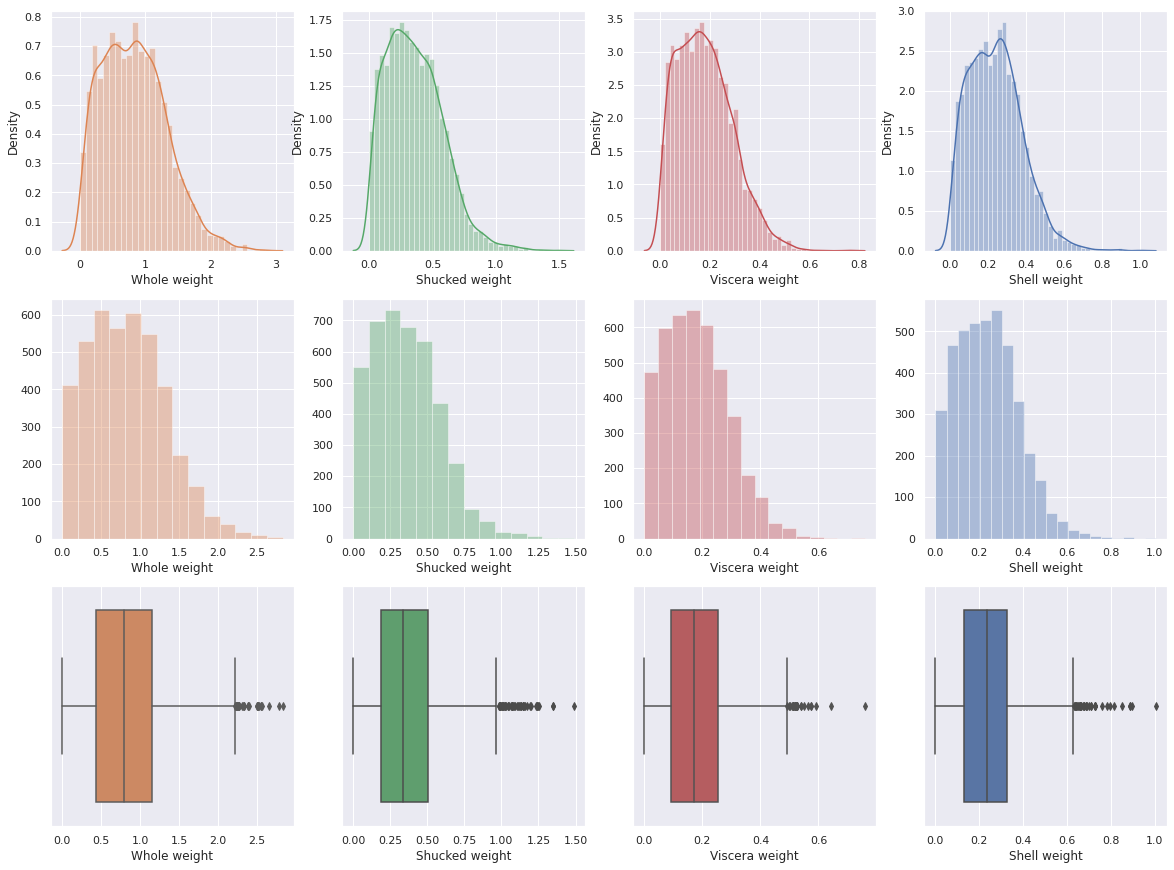

In [8]:
plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Whole weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shell weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Whole weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shucked weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Viscera weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(abalone['Shell weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Whole weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Shucked weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(abalone['Shell weight'], color=colors[i % cols])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


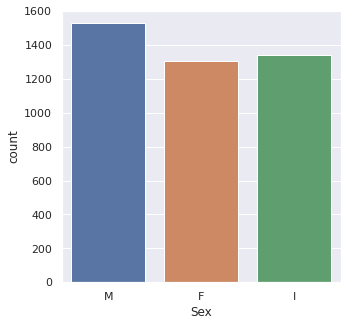

In [9]:
plt.figure(figsize=(5,5))
_ = sns.countplot(abalone.Sex)

**BIVARIATE ANALYSIS**

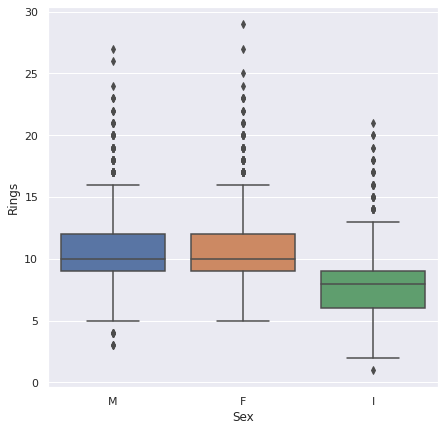

In [10]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Rings')

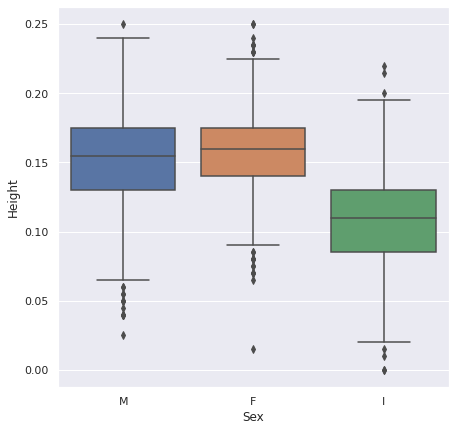

In [11]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Height')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


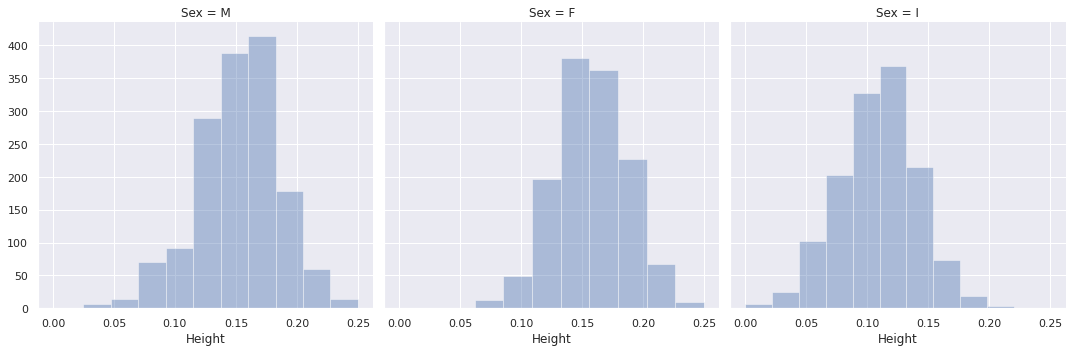

In [12]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

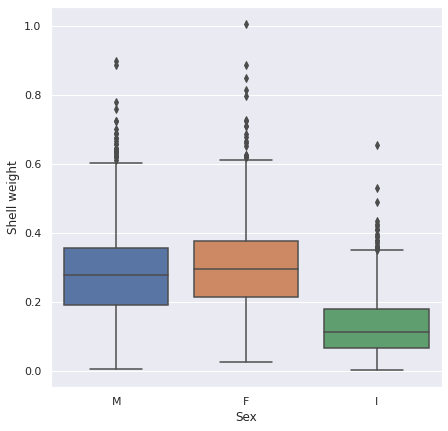

In [13]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=abalone, x='Sex', y='Shell weight')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


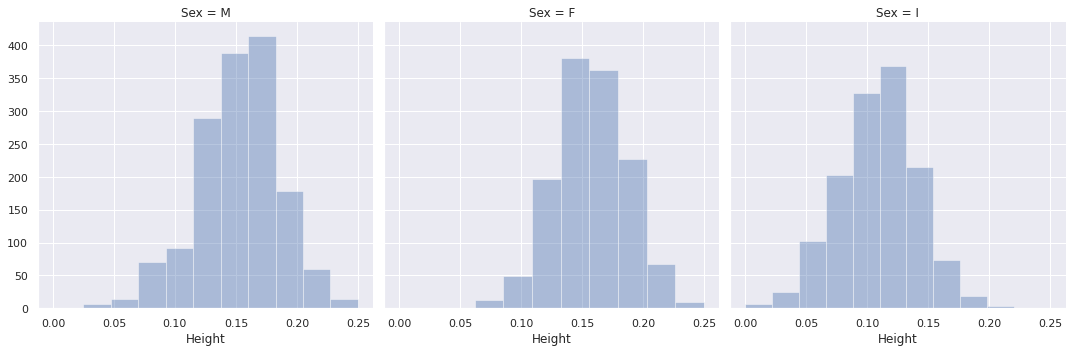

In [14]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

**MULTIVARIATE ANALYSIS**

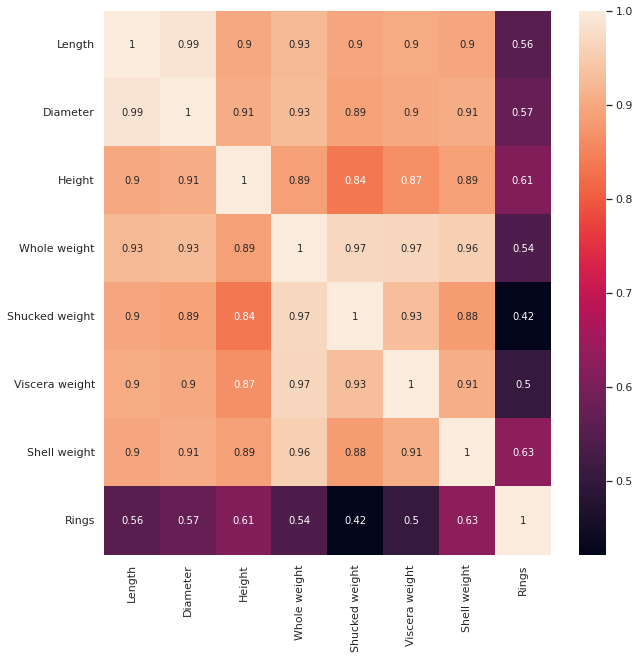

In [15]:
plt.figure(figsize=(10, 10))
corr = abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

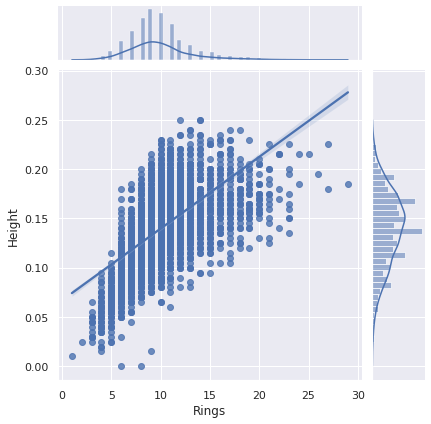

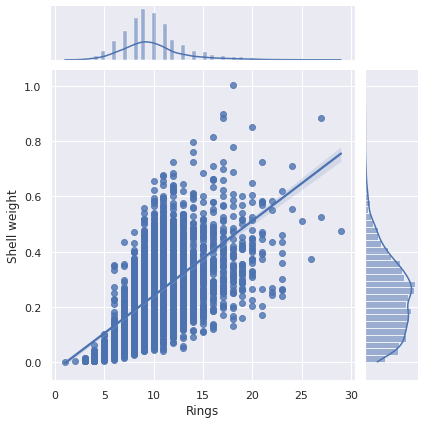

In [16]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')

**DESCRIPTIVE STATISTICS**

In [17]:
abalone.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4175.0,0.523965,0.120084,0.0750,0.45000,0.5450,0.61500,0.8150
Diameter,4175.0,0.407856,0.099230,0.0550,0.35000,0.4250,0.48000,0.6500
Height,4175.0,0.139189,0.038489,0.0000,0.11500,0.1400,0.16500,0.2500
Whole weight,4175.0,0.828468,0.490027,0.0020,0.44150,0.7995,1.15300,2.8255
Shucked weight,4175.0,0.359195,0.221713,0.0010,0.18600,0.3360,0.50175,1.4880
Viscera weight,4175.0,0.180536,0.109534,0.0005,0.09325,0.1710,0.25275,0.7600
Shell weight,4175.0,0.238791,0.139162,0.0015,0.13000,0.2340,0.32875,1.0050
Rings,4175.0,9.934132,3.224802,1.0000,8.00000,9.0000,11.00000,29.0000


**HANDLING WITH MISSING DATA**

In [18]:
df = pd.DataFrame(abalone)
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [19]:
df.fillna(0)



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**OUTLIERS IN EACH ATTRIBUTES**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


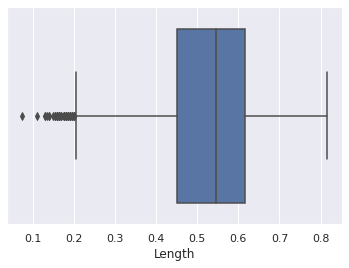

In [20]:
sns.boxplot(df['Length'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


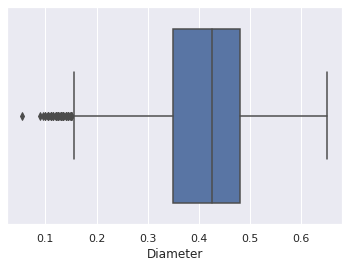

In [21]:
sns.boxplot(df['Diameter'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


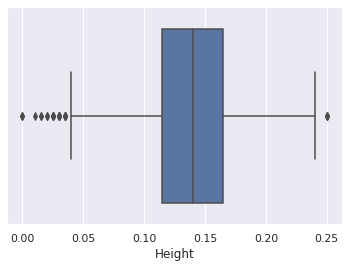

In [22]:
sns.boxplot(df['Height'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


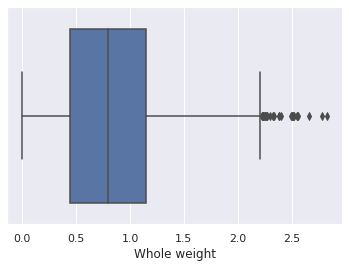

In [23]:
sns.boxplot(df['Whole weight'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


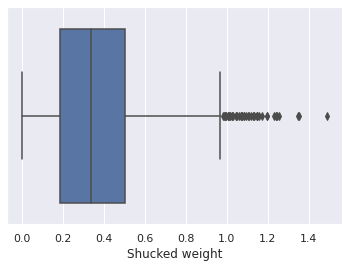

In [24]:
sns.boxplot(df['Shucked weight'],data=df)